# Computer Vision 2021 Assignment 1: Image filtering

In this prac you will research, implement and test some image filtering operations. Image filtering by convolution is a fundamental step in many computer vision tasks and you will find it useful to have a firm grasp of how it works. For example, later in the course we will come across Convolutional Neural Networks (CNNs) which are built from convolutional image filters.

The main aims of the prac are:

- to understand the basics of how images are stored and processed in memory;
- to gain exposure to several common image filters, and understand how they work;
- to get practical experience implementing convolutional image filters;
- to test your intuition about image filtering by running some experiments;
- to report your results in a clear and concise manner.

*This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.*

## General instructions

Follow the instructions in this Python notebook and the accompanying file *a1code.py* to answer each question. It's your responsibility to make sure your answer to each question is clearly labelled and easy to understand. Note that most questions require some combination of Python code, graphical output, and text analysing or describing your results. Although we will check your code as needed, marks will be assigned based on the quality of your write up rather than for code correctness! This is not a programming test - we are more interested in your understanding of the topic.

Only a small amount of code is required to answer each question. We will make extensive use of the Python libraries

- [numpy](numpy.org) for mathematical functions
- [skimage](https://scikit-image.org) for image loading and processing
- [matplotlib](https://matplotlib.org/stable/index.html) for displaying graphical results
- [jupyter](https://jupyter.org) for Jupyter Notebooks

You should get familiar with the documentation for these libraries so that you can use them effectively.

# The Questions

To get started, below is some setup code to import the libraries we need. You should not need to edit it.

In [1]:
# Numpy is the main package for scientific computing with Python. 
import numpy as np

#from skimage import io

# Imports all the methods we define in the file a1code.py
from a1code import *

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## Question 0: Numpy warm up! (5%)

Before starting the assignment, make sure you have a working Python 3 installation, with up to date versions of the libraries mentioned above. If this is all new to you, I'd suggest  downloading an all in one Python installation such as [Anaconda](https://www.anaconda.com/products/individual). Alternatively you can use a Python package manager such as pip or conda, to get the libraries you need. If you're struggling with this please ask a question on the MyUni discussion forum.

For this assignment, you need some familiarity with numpy syntax. The numpy QuickStart should be enough to get you started:

https://numpy.org/doc/stable/user/quickstart.html

Here are a few warm up exercises to make sure you understand the basics. Answer them in the space below. Be sure to print the output of each question so we can see it!

1. Create a 2D numpy array A with 2 rows and 3 columns. Fill with values 1 to 6.
2. Create a 2D numpy array B with 3 rows and 2 columns. Fill with values 6 to 1.
3. Calculate A' + B', where A' is the top left 2x2 submatrix of A.
4. Calculate the *matrix* product of A and B.
5. Calculate the *element wise* product of $A$ and $B^T$ (B transpose).


In [2]:
# import numpy as np
#question 1 
a = np.arange(1,7).reshape(2,3)
print("\n1: = ") #output
print(a)

#question 2
b = np.arange(1,7)[::-1].reshape(3,2)
print("\n2: = ") #output 
print(b)

#question 3 
c = a[:2,:2] + b[:2,:2]    #simple indexing 
print("\n3: = ")
print(c)

#question 4 
d = a @ b  #in python 3.5, the symbol @ is used to do matrix multiplication
print("\n4: = ")
print(d)

#question 5 
e = np.multiply(a,np.transpose(b))
print("\n5: = ")
print(e)



1: = 
[[1 2 3]
 [4 5 6]]

2: = 
[[6 5]
 [4 3]
 [2 1]]

3: = 
[[7 7]
 [8 8]]

4: = 
[[20 14]
 [56 41]]

5: = 
[[ 6  8  6]
 [20 15  6]]


You need to be comfortable with numpy arrays because that is how we store images. Let's do that next!

## Question 1: Loading and displaying an image (10%)

Below is a function to display an image using the pyplot module in matplotlib. Implement the `load()` and `print_stats()` functions in a1code.py so that the following code loads the mandrill image, displays it and prints its height, width and depth. 

In [3]:
# import matplotlib.pyplot as plt
def display(img, caption=''):
    # Show image using pyplot 
    plt.figure()
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()

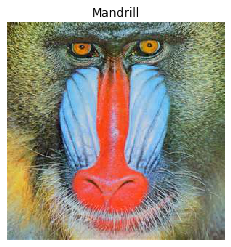

(300, 300, 3)

In [4]:
image1 = load('images/mandrill.jpg') 

display(image1, 'Mandrill') 

print_stats(image1)



Return to this question after reading through the rest of the assignment. Find 2 more images to use as test cases in this assignment and display them below. Use your print_stats() function to display their height, width and number of channels. Explain *why* you have chosen each image.

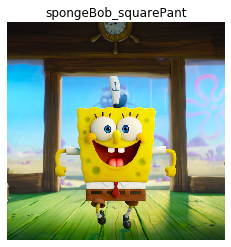

(700, 700, 3)

In [5]:
### Your code to load and display your images here

image2 = load('images/spongeBob.jpg')
display(image2,'spongeBob_squarePant')
print_stats(image2)



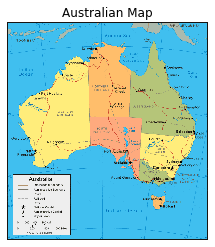

(750, 693, 4)

In [6]:
image3 = load('images/map.jpg')
display(image3,'Australian Map')
print_stats(image3)

***Your explanation of images here***

I chose image 2 because I like to watch Sponge Bob, just kidding, I chose it because there are clear edges on SpongeBob since he is in square shape. 

I chose image 3 because the color of it is quite straight fowards, and each states are separated by borders.

## Question 2: Image processing (20%)

Now that you have an image stored as a numpy array, let's try some operations on it.

1. Implement the `crop()` function in a1code.py. Use array slicing to crop the image.
2. Implement the `resize()` function in a1code.py.
3. Implement the `change_contrast()` function in a1code.py.
4. Implement the `greyscale()` function in a1code.py.

Is the contrast function always reversible? Explain why or why not.

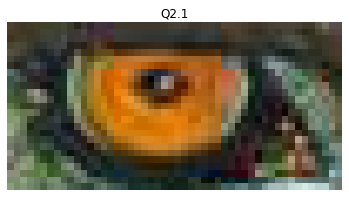

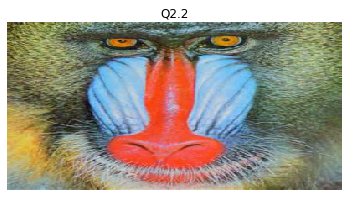

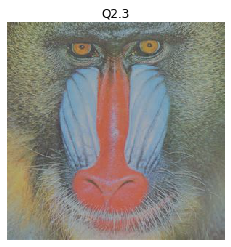

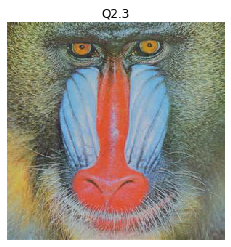

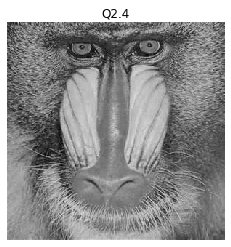

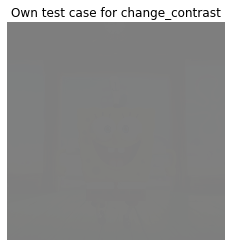

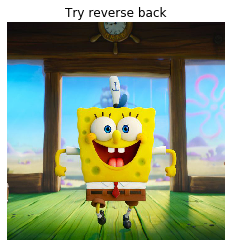

In [7]:
# This should crop the eye from the mandrill image
display(crop(image1, 25, 80, 25, 50), 'Q2.1')

display(resize(image1, 200, 400), 'Q2.2')

display(change_contrast(image1, 0.5), 'Q2.3')
display(change_contrast(image1, 1.5), 'Q2.3')

image1 = load('images/mandrill.jpg') 
display(greyscale(image1), 'Q2.4')

# Add your own tests here...
image_bob = image2
display(change_contrast(image_bob,0.01), 'Own test case for change_contrast')

#trying to convert back
display(change_contrast(image_bob,100.0), 'Try reverse back')
#No, it is not always reversible, as we can see from the example,
#a small amount of information is lost due to contrast function


## Question 3: Convolution (20%)

### 3.1 2D convolution

Using the definition of 2D convolution from week 1, implement the convolution operation in the function `conv2D()` in a1code.py.


In [8]:
test_conv2D()

### 3.2 RGB convolution

In the function `conv` in a1code.py, extend your function `conv2D` to work on RGB images, by applying the 2D convolution to each channel independently. 

### 3.3 Gaussian filter convolution

Use the `gauss2D` function provided in a1code.py to create a Gaussian kernel, and apply it to your images with convolution. You will obtain marks for trying different tests and analysing the results, for example:

- try varying the image size, and the size and variance of the filter  
- subtract the filtered image from the original - this gives you an idea of what information is lost when filtering

What do you observe and why?

### 3.4 Sobel filters

Define a horizontal and vertical Sobel edge filter kernel and test them on your images. You will obtain marks for testing them and displaying results in interesting ways, for example:

- apply them to an image at different scales
- considering how to display positive and negative gradients
- apply different combinations of horizontal and vertical filters

In [9]:
image1 = load('images/mandrill.jpg')

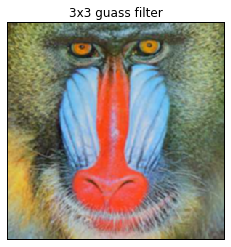

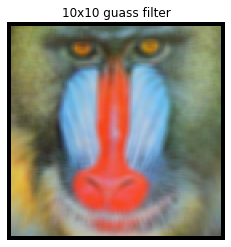

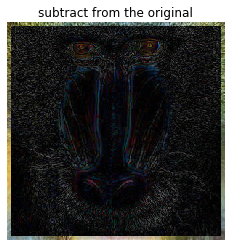

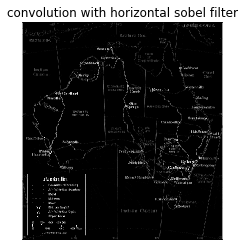

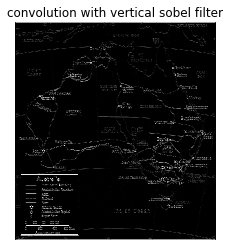

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


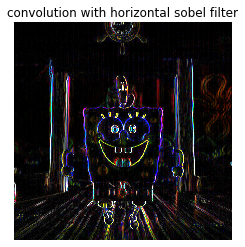

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


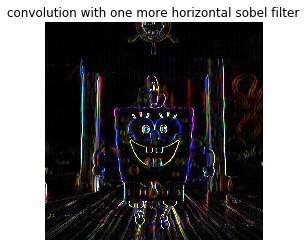

In [10]:
# Your code to answer 3.3, 3.4 and displaay results here.
from skimage import color
kernel = gauss2D(3,3)
image_gauss = image1
output_img = conv2D(image_gauss,kernel)
display(output_img,'3x3 guass filter')

#trying varying the size of the filter 
kernel2 = gauss2D(10,10)
output_img2 = conv2D(image_gauss,kernel2)
display(output_img2,'10x10 guass filter')
#observe that the smoothing effect is greater when the number of kernel is larger 


#subtract the filtered image from the original
sub_img = load('images/mandrill.jpg')
for i in range(image1.shape[0]):
    for j in range(image1.shape[1]):
        sub_img[i][j] = sub_img[i][j] - output_img2[i][j]

display(abs(sub_img),'subtract from the original')
#I observe that the detail is being kept, this is the effect of convolution. 


'''3.4 Sobel Filters'''
sobel_hor = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])
sobel_ver = np.array(
[
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])
#horizontal sobel filter on the car image 
image_sobel = load('images/map.jpg')
image_sobel = rgb2gray(image_sobel)
output_img3 = conv2D(image_sobel,sobel_hor)
display(abs(output_img3),'convolution with horizontal sobel filter')
#vertical sobel filter on the car image 
output_img4 = conv2D(image_sobel,sobel_ver)
display(abs(output_img4),'convolution with vertical sobel filter')

#image of different scale with horizontal and vertifal sobel filter 
image_sobel2 = load('images/spongeBob.jpg')
output_img5 = conv2D(image_sobel2,sobel_hor)
display(abs(output_img5),'convolution with horizontal sobel filter')
output_img6 = conv2D(image_sobel2,sobel_hor)
display(abs(output_img6),'convolution with one more horizontal sobel filter')



***Your comments/analysis of your results here...***
When trying varying the size of the filter, I observe that the smoothing effect is greater when the size of gaussion kernel is larger. 
When subtracting the output image from the original image, i observe that the detail is being kept.
Using the sobel filter, we can see that only edges with certain direction is kept, such as when applying a horizontal sobel filter, edges with vertical lines are kept.


## Question 4: Image sampling and pyramids (25%)

### 4.1 Image Sampling

Apply your `resize()` function to reduce an image to 0.125 height and width, and then to enlarge the image back to its original size. Display the result and compare to the original image. Apply a Sobel filter to the resulting image and compare to the original. What do you observe and why?

### 4.2 Image Pyramids 

Repeat this procedure, but this time, apply a Gaussian filter to the image before resizing. What do observe, and why?

Repeat again, but this time apply the scaling in 3 steps of 0.5, creating a pyramid of images. What do you observe, and why?


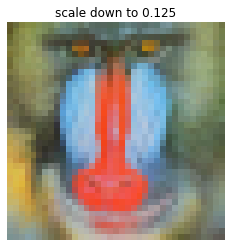

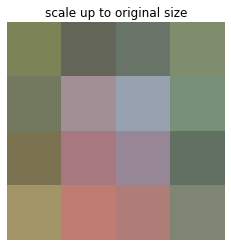

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


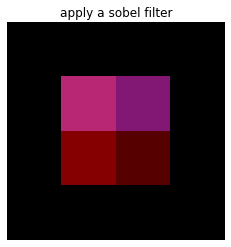

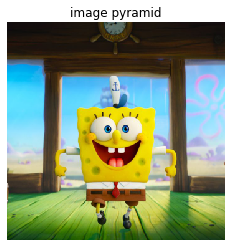

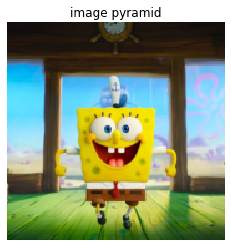

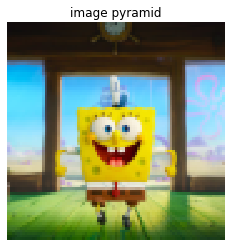

In [25]:
# Your answers to question 4 here

img = load('images/mandrill.jpg')
 #scale down 3 times to 0.125
scale_down_img1 = img
for i in range(3):
    scale_down_img1 = resize(scale_down_img1,int(scale_down_img1.shape[0]/2),int(scale_down_img1.shape[1]/2))
display(scale_down_img1,'scale down to 0.125')
#scale back to original size 

scale_up_img1 = scale_down_img1
for i in range(3):
    scale_up_img1 = resize(scale_up_img1,int(scale_up_img1.shape[0]/2),int(scale_up_img1.shape[1]/2))
display(scale_up_img1,'scale up to original size')

#apply a sobel filter to it 
sobel_img = conv2D(scale_up_img1,sobel_ver)
display(sobel_img,'apply a sobel filter')


#the image seems worse after applying the sobel filter

gau_img = load('images/spongeBob.jpg')
scale_down_img2 = gau_img
for i in range(3):
    conv2D(scale_down_img2,gauss2D(3,3))
    scale_down_img2 = resize(scale_down_img2,int(scale_down_img2.shape[0]/2),int(scale_down_img2.shape[1]/2))
    display(scale_down_img2,'image pyramid')

#the image lost more information using this method 





***Your comments/analysis of your results here...***
Apply a Sobel filter to the resulting image and compare to the original, I had notice that the image is completely ruined with only a small amout of details left. From the image we can see that the areas of edges have the strongest gradient.

By apply a Gaussian filter to the image before resizing, it makes the image smoother, because it average the surround pixels. After apply the scaling in 3 steps of 0.5, we can still see a great amount of details are kept which is much better than the image we done for 4.1. 



## Question 5: Auto correlation (20%)

Recall from week 2 that cross-correlation is a measure of similarity between a template and an image. It is defined similarly to convolution.

### 5.1 Correlation function

Implement the function `corr()` in a1code.py, based on your convolution function. Hint: numpy's `flip()` function may be useful here.

### 5.2 Auto-correlation

We will experiment with *auto-correlation*, where the template patch is taken from the image it is being compared to. Use the cropped eye from Question 2 as your template. Calculate the correlation of that template with every location in the image, and display the output as an image. Where is the maximum similarity? (Hint: numpy functions `argmax()` and `unravel()` will be useful here). For simplicity, you can use a greyscale version of the image and template.

Is it what you expect? Why or why not?

### 5.3 Modified auto-correlation

Try modifying your correlation template or the base image in different ways, and analyse the effect on correlation results. For example:

- if you did not find the correct location in 5.2, try centering the template about its mean (i.e. subtracting the mean brightness from each pixel)
- if you did find the correct location in 5.2, try using `resize()` and `change_contrast()` on the image. Where does it fail?

As before you will obtain marks for coming up with interesting tests and analysis, and displaying your results clearly. 


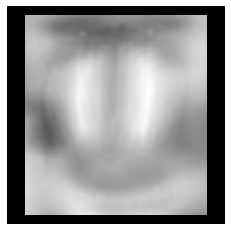

In [22]:
# Your code to answer question 5 and display results here
img = load('images/mandrill.jpg')
sobel_hor = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

image_eye = crop(img, 25, 80, 25, 50)
img = rgb2gray(img)
image_eye = rgb2gray(image_eye)
corr1 = corr(img,image_eye)
display(corr1)


***Your comments/analysis of your results here...***

## Question 6: Normalised cross correlation (postgraduate, 10%)

*This question is required for postgraduate students only. PG marks for the other questions will be scaled by 0.9.*

Search online for "normalized cross correlation" (NCC). Implement and test NCC, and compare to your previous correlation results. 

***Your comments/analysis of your results here...***